# Análisis de Clustering con los Conjuntos de Datos Breast Cancer y Adult

Este cuaderno demuestra técnicas de clustering en los conjuntos de datos Breast Cancer y Adult, incluyendo pipelines de preprocesamiento, métodos de clustering y evaluación.

### 1. Clustering en el Conjunto de Datos Breast Cancer
#### 1.1 Carga y Exploración del Conjunto de Datos Breast Cancer

Primero, cargamos el conjunto de datos Breast Cancer y exploramos sus características.

In [11]:
from sklearn.datasets import load_breast_cancer 
import pandas as pd

data = load_breast_cancer()
X = data.data 
y = data.target 
feature_names = data.feature_names

df = pd.DataFrame(X, columns=feature_names) 
df['target'] = y 

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### 1.2 Preprocesamiento: Escalado de Características

Luego, escalamos las características del conjunto de datos Breast Cancer.

In [12]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 1.3 Métodos de Clustering
**K-Means, Clustering Jerárquico, DBSCAN, Gaussian Mixture Models**

Procedemos a aplicar los métodos de clustering K-Means, Clustering Jerárquico, DBSCAN y Gaussian Mixture Models al conjunto de datos Breast Cancer.

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [4]:
# Definir k para clustering
k = 2

# Clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Coeficiente de Silueta para K-Means: {silhouette_kmeans:.4f}")

# Clustering Jerárquico
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)
silhouette_agg = silhouette_score(X_scaled, labels_agg)
print(f"Coeficiente de Silueta para Clustering Jerárquico: {silhouette_agg:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
mask = labels_dbscan != -1
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"Coeficiente de Silueta para DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN no encontró clústeres distintos.")

# Modelo de Mezcla Gaussiana
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"Coeficiente de Silueta para GMM: {silhouette_gmm:.4f}")

Coeficiente de Silueta para K-Means: 0.3447
Coeficiente de Silueta para Clustering Jerárquico: 0.3394
Coeficiente de Silueta para DBSCAN: 0.0978
Coeficiente de Silueta para GMM: 0.3145


El coeficiente de silueta se utiliza para evaluar la calidad de los clusters. Entre más cercano a 1, mejor. 

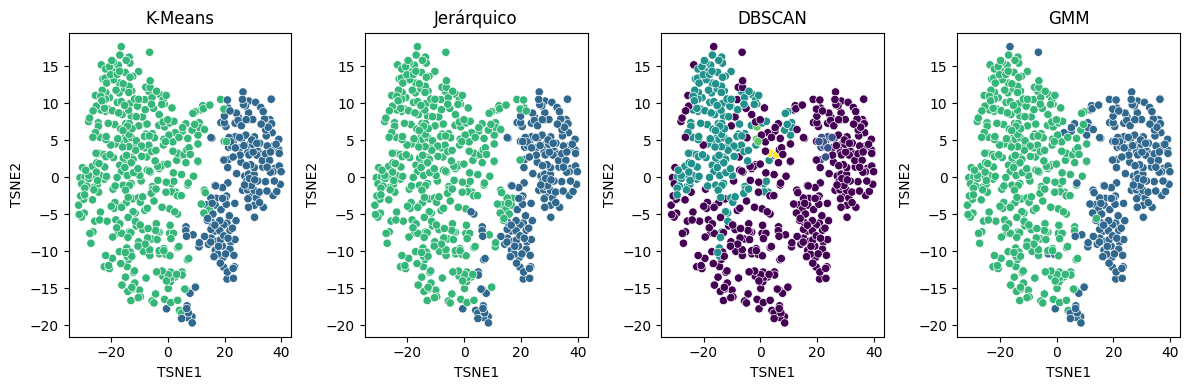

In [7]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un Tsne para visualizar los resultados

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=42)
X_tsne=tsne.fit_transform(X_scaled)

results['TSNE1'] = X_tsne[:,0]
results['TSNE2'] = X_tsne[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='K-Means', palette='viridis', legend=False, data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Jerárquico', palette='viridis', legend=False, data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DBSCAN', palette='viridis', legend=False, data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM', palette='viridis', legend=False, data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

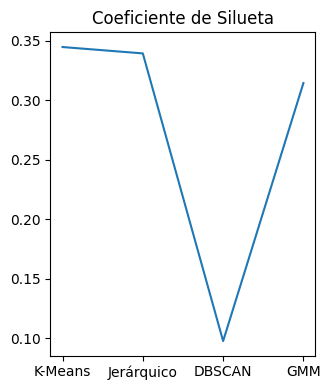

In [10]:
## Visualización de los Coeficientes de Silueta

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.lineplot(x=['K-Means', 'Jerárquico', 'DBSCAN', 'GMM'], y=[silhouette_kmeans, silhouette_agg, silhouette_dbscan, silhouette_gmm])

plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()



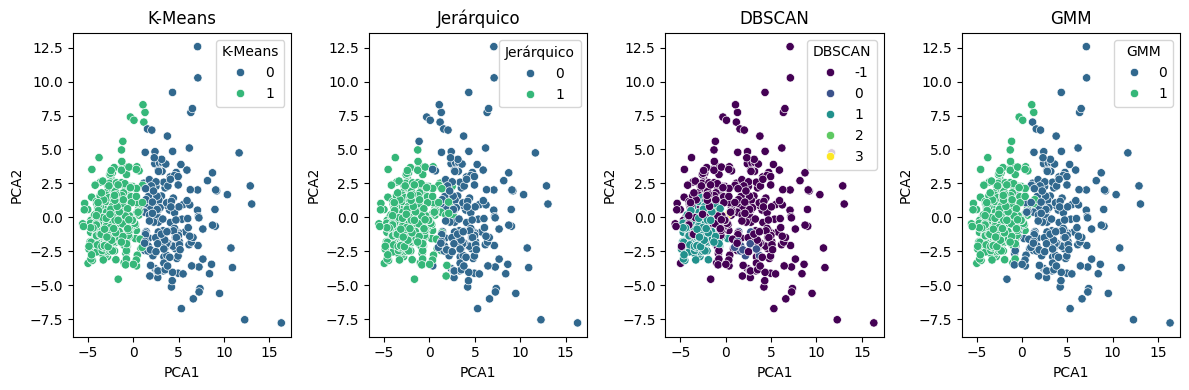

In [14]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un PCA para visualizar los resultados

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

results['PCA1'] = X_pca[:,0]
results['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='K-Means', palette='viridis',  data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Jerárquico', palette='viridis',  data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN', palette='viridis',  data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM', palette='viridis',  data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Target')

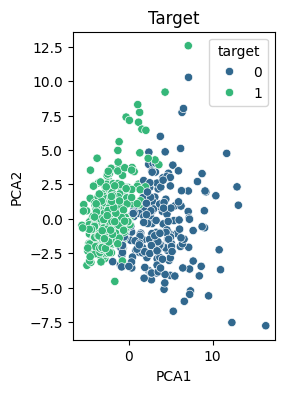

In [15]:
## Comparemos PCA con Target

results['target'] = y

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', palette='viridis',  data=results)
plt.title('Target')

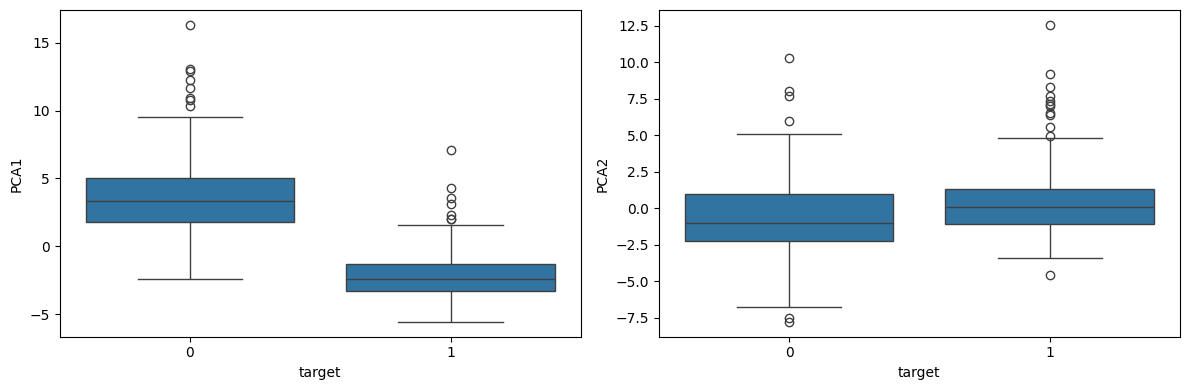

In [16]:
## Usemos un boxplot para comparar PCA con Target

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='PCA1', data=results)

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='PCA2', data=results)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Target')

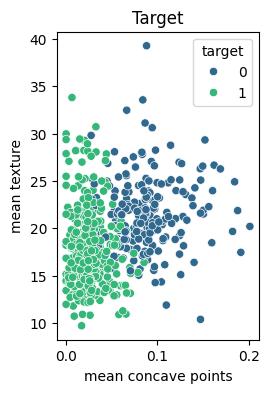

In [18]:
results['target'] = y
results['mean concave points'] = X['mean concave points']
results['mean texture'] = X['mean texture']

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='mean concave points', y='mean texture', hue='target', palette='viridis',  data=results)
plt.title('Target')

In [22]:
### comparemos target con DBSCAN
## Hagamos una matriz de coocurrencia

cooocu=pd.crosstab(results['target'], results['DBSCAN'])
cooocu

DBSCAN,-1,0,1,2,3
target,,,,,
0,191,12,9,0,0
1,180,0,172,3,2


In [23]:

cooocu=pd.crosstab(results['target'], results['K-Means'])
cooocu

K-Means,0,1
target,,
0,175,37
1,13,344
